#1.Data Load

In [ ]:
import time
import os
from PIL import Image
import sys
import numpy as np
from matplotlib.pyplot import imshow, subplots, title
from torchvision import transforms
import albumentations
import random

In [ ]:
!pip install opencv-python
import cv2
cv2.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'4.6.0'

In [ ]:
# 구글 드라이브 이용
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/sample_data

/content/sample_data


In [ ]:
!unzip -qq "/content/drive/MyDrive/Colab Notebooks/datasets/pill_data_13.zip"

In [ ]:
!unzip -qq "/content/drive/MyDrive/Colab Notebooks/datasets/pill_data_46.zip"

In [ ]:
import os, shutil, pathlib

In [ ]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

createFolder('/content/sample_data/split_data')

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

createFolder('/content/sample_data/split_data/train')

for i in range(1,7):
  # 결과 저장 폴더 생성
  out_dir =f"/content/sample_data/split_data/train/{i}"
  if out_dir not in os.listdir():
      os.mkdir(out_dir)

In [ ]:
def make_subset(start_index, end_index):
  for category in range(1,7):
    original_dir = pathlib.Path(f"/content/sample_data/{category}")
    dir = pathlib.Path(f"/content/sample_data/split_data/train/{category}")
    fnames = [f'{category}_{i}.jpg' for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src = original_dir /fname,
                      dst = dir / fname)

In [ ]:
make_subset(start_index = 201, end_index = 801)

In [ ]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

createFolder('/content/sample_data/split_data')

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

createFolder('/content/sample_data/split_data/valid')

for i in range(1,7):
  # 결과 저장 폴더 생성
  out_dir =f"/content/sample_data/split_data/valid/{i}"
  if out_dir not in os.listdir():
      os.mkdir(out_dir)

In [ ]:
def make_subset(start_index, end_index):
  for category in range(1,7):
    original_dir = pathlib.Path(f"/content/sample_data/{category}")
    dir = pathlib.Path(f"/content/sample_data/split_data/valid/{category}")
    fnames = [f'{category}_{i}.jpg' for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src = original_dir /fname,
                      dst = dir / fname)

In [ ]:
make_subset(start_index = 1, end_index = 101)
make_subset(start_index = 801, end_index = 901)

In [ ]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

createFolder('/content/sample_data/split_data')

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

createFolder('/content/sample_data/split_data/test')

for i in range(1,7):
  # 결과 저장 폴더 생성
  out_dir =f"/content/sample_data/split_data/test/{i}"
  if out_dir not in os.listdir():
      os.mkdir(out_dir)

In [ ]:
def make_subset(start_index, end_index):
  for category in range(1,7):
    original_dir = pathlib.Path(f"/content/sample_data/{category}")
    dir = pathlib.Path(f"/content/sample_data/split_data/test/{category}")
    fnames = [f'{category}_{i}.jpg' for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src = original_dir /fname,
                      dst = dir / fname)

In [ ]:
make_subset(start_index = 101, end_index = 201)
make_subset(start_index = 901, end_index = 1001)

#2.Data Augmentation 

In [ ]:
for i in range(1, 7):
  for j in range(201, 801):
    img = cv2.imread(f'/content/sample_data/split_data/train/{i}/{i}_{j}.jpg', cv2.IMREAD_COLOR)

    img1 = cv2.rotate(img, cv2.ROTATE_180) # 180도 회전
                                                             
    os.chdir(f'/content/sample_data/split_data/train/{i}')
    cv2.imwrite(f'180_{i}_{j}.jpg', img1)

In [ ]:
for i in range(1,7):
  for j in range(201,801):    
    image = cv2.imread(f'/content/sample_data/split_data/train/{i}/{i}_{j}.jpg', cv2.IMREAD_COLOR)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 커널 생성 (대상이 있는 픽셀을 강조)
    kernel = np.array([[0,-1,0],
                       [-1,5,-1],
                       [0,-1,0]])
    # 커널 적용
    image_sharp = cv2.filter2D(image_rgb, -1, kernel)

    os.chdir(f"/content/sample_data/split_data/train/{i}")
    cv2.imwrite(f's_{i}_{j}.jpg', image_sharp)

In [ ]:
for i in range(1, 7):
  for j in range(201,801):
    img = cv2.imread(f'/content/sample_data/split_data/train/{i}/s_{i}_{j}.jpg', cv2.IMREAD_COLOR)


    img1 = cv2.rotate(img, cv2.ROTATE_180) # 180도 회전

                                                          
    os.chdir(f'/content/sample_data/split_data/train/{i}')

    cv2.imwrite(f's180_{i}_{j}.jpg', img1)


In [ ]:
train_dir = '/content/sample_data/split_data/train'
valid_dir = '/content/sample_data/split_data/valid'
test_dir  = '/content/sample_data/split_data/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (250, 250),
                  batch_size = 120,
                  class_mode = 'categorical')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (250, 250),
                  batch_size = 60,
                  class_mode = 'categorical')

Found 14400 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (250, 250, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(6, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 21,139,014
Trainable params: 21,139,014
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers

model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr = 0.000005),
              metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 30,
                       epochs = 20,
                       validation_data = valid_generator,
                       validation_steps = 20)

Epoch 1/20
30/30 [==============================] - 603s 19s/step - loss: 1.2145 - accuracy: 0.5867 - val_loss: 0.2766 - val_accuracy: 0.9900
Epoch 2/20
30/30 [==============================] - 577s 19s/step - loss: 0.1428 - accuracy: 0.9783 - val_loss: 0.0136 - val_accuracy: 0.9992
Epoch 3/20
30/30 [==============================] - 574s 19s/step - loss: 0.0162 - accuracy: 0.9972 - val_loss: 0.0057 - val_accuracy: 0.9992
Epoch 4/20
30/30 [==============================] - 584s 20s/step - loss: 0.0061 - accuracy: 0.9992 - val_loss: 0.0028 - val_accuracy: 0.9992
Epoch 5/20
30/30 [==============================] - 567s 19s/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9992
Epoch 6/20
30/30 [==============================] - 568s 19s/step - loss: 0.0023 - accuracy: 0.9997 - val_loss: 0.0018 - val_accuracy: 0.9992
Epoch 7/20
30/30 [==============================] - 568s 19s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 0.9992
Epoch 

#3. Model


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (250, 250),
                 batch_size = 60,
                 class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (250, 250),
                 batch_size = 60,
                 class_mode = 'categorical')

Found 1200 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


In [ ]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 20)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

20/20 [==============================] - 129s 6s/step - loss: 3.9405e-04 - accuracy: 1.0000
Loss = 0.00039
Accuracy = 1.00000
20/20 [==============================] - 121s 6s/step - loss: 3.9405e-04 - accuracy: 1.0000
Loss = 0.00039
Accuracy = 1.00000


In [ ]:
#model save
model.save('/content/drive/MyDrive/Colab Notebooks/model/test_vgg16_6.h5')

In [ ]:
#model load
from tensorflow.keras.models import load_model

model_google = load_model('/content/drive/MyDrive/Colab Notebooks/model/test_vgg16_6.h5')

In [ ]:
test_image = "/content/4_217.jpg"
from PIL import Image
import numpy as np

img = Image.open(test_image)
img = img.resize((250,250))
data = np.asarray(img)
X = np.array(data)
X = X.astype("float") / 256
X = X.reshape(-1,250,250,3)


# 예측
pred = model.predict(X)  
result = [np.argmax(value) for value in pred]   # 예측 값 중 가장 높은 클래스 반환

print(result[0]+1)

1/1 [==============================] - 1s 1s/step
4


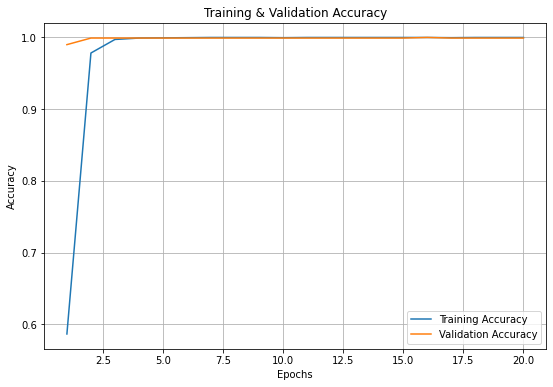

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

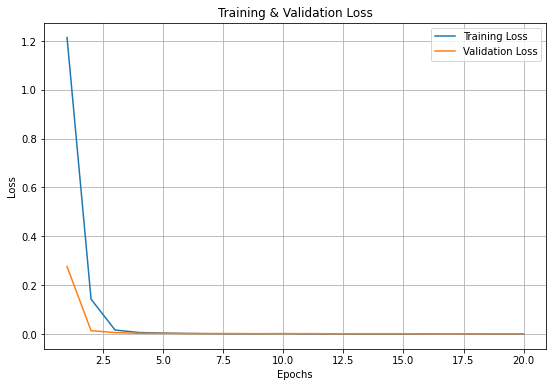

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

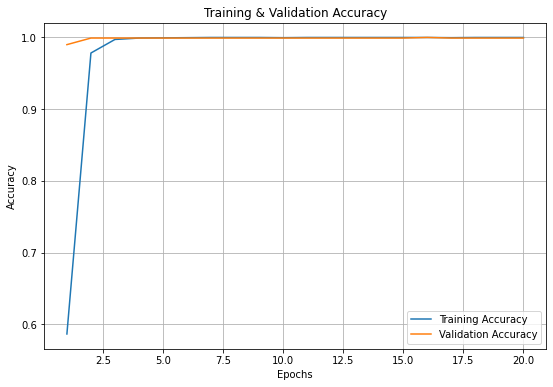

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

#4. Answer 도출

In [ ]:
test_image = "/content/1_655.jpg"
from PIL import Image
import numpy as np

img = Image.open(test_image)
img = img.resize((250,250))
data = np.asarray(img)
X = np.array(data)
X = X.astype("float") / 256
X = X.reshape(-1,250,250,3)


# 예측
pred = model.predict(X)  
result = [np.argmax(value) for value in pred]   # 예측 값 중 가장 높은 클래스 반환

print(result[0]+1)

In [ ]:
test_image = "/content/2_786.jpg"
from PIL import Image
import numpy as np

img = Image.open(test_image)
img = img.resize((250,250))
data = np.asarray(img)
X = np.array(data)
X = X.astype("float") / 256
X = X.reshape(-1,250,250,3)


# 예측
pred = model.predict(X)  
result = [np.argmax(value) for value in pred]   # 예측 값 중 가장 높은 클래스 반환

print(result[0]+1)

In [ ]:
test_image = "/content/3_317.jpg"
from PIL import Image
import numpy as np

img = Image.open(test_image)
img = img.resize((250,250))
data = np.asarray(img)
X = np.array(data)
X = X.astype("float") / 256
X = X.reshape(-1,250,250,3)


# 예측
pred = model.predict(X)  
result = [np.argmax(value) for value in pred]   # 예측 값 중 가장 높은 클래스 반환

print(result[0]+1)

In [ ]:
test_image = "/content/5_10.jpg"
from PIL import Image
import numpy as np

img = Image.open(test_image)
img = img.resize((250,250))
data = np.asarray(img)
X = np.array(data)
X = X.astype("float") / 256
X = X.reshape(-1,250,250,3)


# 예측
pred = model.predict(X)  
result = [np.argmax(value) for value in pred]   # 예측 값 중 가장 높은 클래스 반환

print(result[0]+1)

In [ ]:
metrics.confusion()